# Data pre-processing steps using Pandas

By Gabe Wilberscheid

If you got into Data-Science and Machine Learning because you thought most your day you would be working with AI and building models, I have bad news for you. Most of your time is actually spent collecting good data, then "cleaning" that data so you can feed your models good features. In this notebook I will walk you through the steps required to get your data ready for machine learning.

In general, and there are exceptions to this with some models, you want all values in your data to be between 1 and 0.

### Steps in Data Cleaning
1.  Collect your Data
2.  Check that data for missing values, or Nan
3.  Decide if you are going to drop that data or if you can accurately fill in missing data
4.  Work with cateigorical data and create numerical representations, usally dummy variables also known as one-hot vectors
5.  Try to create new features(feature engineering) that may generate insight for your model
6.  Normalize data and split into train and test sets
7.  Understand what features are important in your model and report on them

We will go into more detail once we get to each step

## Libraries
Using Python for machine learning only requires these 4 main libraries that are industry standard.
### Pandas
https://pandas.pydata.org/
Pandas is used for importing files, locating your data, checking for Nans, and much more. Pandas uses a data structure called a DataFrame, that is a Pandas object with many useful methods.
### Numpy
http://www.numpy.org/
Numpys main use is as a N d-array object, with several useful methods. We will often put these arrays into a Pandas DataFrame, and later use them to extract single feature arrays to feed models.
### Scikit-Learn
http://scikit-learn.org/stable/
Scikit-learn is a package used to implement algorithms and machine learning. It also has several great features for pre-processing data.
### Matplotlib.pyplot
https://matplotlib.org/api/pyplot_api.html
There are many libaries to plot our data, but no more popular than matplotlib.pyplot.

There is no better way to learn something by doing it. And there is no better way to check your understanding of a subject than by teaching it. Here we will use a dataset provided by Kaggle.com, the popular data science website. The dataset is for a Telco company and interested in customer retention. As a young data scientist get used to problems like this, every company has them and uses them to prevent turnover. The reason I picked this dataset is because it has a mix of numerical and categorical data, and has some missing values.

In [1]:
# The import as name as standard in practice, I suggest you use these
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Collect Data

We need to load in our data, this is where pandas really shines. We are able to quickly read in any type of file data will be in, including CSV, SQL tables, and much more. The best part is pandas brings it in as a DataFrame, which will save us a ton of time.

In [2]:
telco_data = pd.read_csv('./telco-customer-churn/data.csv')
print(type(telco_data))

<class 'pandas.core.frame.DataFrame'>


### Pandas DataFrames
Pandas allows us to get the info we need quick, here are some common methods that we almost will always use.

In [3]:
# head() give us just the first 5 rows of our data
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2: Check for missing values and Nan's

In [4]:
# tells about data types, and if there are nulls, also gives use a rough memory usage on the bottom
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# This gives us info about numerical data
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# We have many other data types, this gives use not just numberical, but also columns with object types
telco_data.describe(include=['object'], exclude=['number'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5539-HIVAK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


We are going to drop the customerID because we do not need it. In the real world you would probaly keep it and at the end we would find the high risk individuals who may drop our service and make an extra effort to keep them with us.

In [7]:
telco_data.drop('customerID', axis=1,inplace=True)

## Step 3: Decide what to do with missing data

As you, see this can be very helpful to see the number of unique values in each column. With a quick glance we can see something weird with the column TotalCharges. Even though it is a float it is being read as an object, lets quick fix this.

In [8]:
# Pandas has a converter for strings to numbers
# In this case there is a value of ' ' in row 488 which may have been the issue
telco_data['TotalCharges'] = telco_data[pd.to_numeric(telco_data['TotalCharges'])]
telco_data.info()

ValueError: Unable to parse string " " at position 488

As you can see we have an issue in row 488, I left this in here because as a data scientist you will encounter strange data all the time. We have a few options, we could just drop that row, which in our case would not likely matter much, but we can do better. 

Let's first fill in these errors with a Nan value, then we can replace the Nan's with 0's. That way we can view if this is the correct choice. For example, if there are no 0's naturally in this column or the real values are no where near 0, we should not do this and would be better off filling them in with the mean or median value.

In [9]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'],errors='coerce').fillna(0).astype(float)
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


Let's quick check if that was the correct value to fill in.

In [10]:
# We pass in a list with our percentitles to include, we are only intrested in the lowest
telco_data['TotalCharges'].describe(percentiles=[.01])

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
1%         19.750000
50%      1394.550000
max      8684.800000
Name: TotalCharges, dtype: float64

As we can see the lowest 1% is only $19.75 in this case, we are probably correct in filling in that pesky ' ' with a value of 0, let's proceed

## Step 4: Convert categorical data into numerical data

As I will explain later we do not want to convert all categorical columns into numbers in that column. For now we will just convert the necessary columns into 'category' types.
Pandas has a handy accessor 'cat.codes' which is exactly what we want here to turn them into numbers.

In [11]:
# We will first convert columns with just 2 options to have the values 0 and 1
for col in telco_data.columns:
    # check to see it only has 2 possible values
    if telco_data[col].nunique() == 2:
        # convert to a category so we can use cat.codes
        telco_data[col] = telco_data[col].astype('category')
        # turns categories into 0 and 1
        telco_data[col] = telco_data[col].cat.codes

telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


If our data only has two options, such as 'yes' & 'no' or 'male' & 'female' we can just give them a value of 0 and 1. However, if we have more than 2 options we CANNOT just assign them the values of 0, 1, and 2.

To explain this, imagine we have 5 options in a fictitious column, 'cat', 'dog', 'fish', 'hamster', and 'no pets'. If we just put them all in a column with values 0,1,2,3, and 4 respectively. We just told our model that 'dog' X 2 = 'hamster'. This is very wrong, they are each independent and have no natural order amongst each other.

Now not all categorical values with more than 2 options are like the pet example. If we had the categorical data 'low', 'medium', and 'high. We could just give them the values 0,1, and 2. This is because they have a natural relationship with each other in this case.

What we must do in situations like our pet example is create one-hot encoding , also sometimes called dummy variables. We create new columns for each of our possible options and if they satisfy that column, they get a 1, otherwise, they get a 0. It makes more sense once we do it and you can see what I mean.

In [12]:
telco_data.describe(include=['object'])

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [13]:
dummy_cols = []
for col in telco_data.columns:
    # these are the other catergorical columns
    if telco_data[col].dtype == 'object':
        dummy_cols.append(col)
# here is where we create one-hot columns, the drop_first tells it to create dummy variables
telco_data = pd.get_dummies(telco_data, dummy_cols, drop_first=True)

telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


Let me explain why we dropped the first of each column. Imagine we had the possible options 'yes','no', and 'no internet service' as we do in this dataset. If we create a one-hot vector for each one, a possible row example could read 0,0, and 1. Since we have no missing values, given the first two columns read 0 and 0. We could always infer that the third must be 1. Put another way, we gain no new information having all 3 columns, in fact we are actually giving our model the same information but in different forms. This is very bad because it will learn to be biased and not predict well. This is often called the "Dummy Trap". To avoid this we just drop one of the columns, Pandas does this for use easily. 

## Step 5: Ceate New Features/Feature Engineering
This step is very important in the real world and seperates a good from great data scientist. However, you need a more unique dataset than we have here. Our data is very straightforward and we understand what it means just by reading the column title. Feature engineering is more common in very complex datasets, and just adding more features here is very unlikely to help. Adding features that the model could already infer would just lead to repetitvie information and cause a biased model. We will skip this step with this dataset.

## Step 6: Split Data and Normalize/Standardize
We normalize and scale data so that it has a value between 1 and 0 and roughly fits along a normal distribution(Bell Curve). More precisely we update features by removing the mean and scaling to unit variance for each column. Not all types of machine learning models require this, but it often helps speed up training and will not hurt. Of course when we split the data between train and test, we will have to remove the churn column, as this is what we will be predicting.

Before we Normalize and Standardize our data, I am going to remove the Churn column so we can predict it later. We will call this the y variable because it is the prediction of the X features in our dataset.

I also am going to first split the test and train sets. This is important we do this before standardization and normalization because otherwise we are giving our model data that will not represent real world situations. To further elaborate, if we didn't split first, our whole dataset is fitted in an unatural way compaired to real world data coming in.

Here we will get away from Pandas and use the popular machine learning library, Sklearn. Sklearn has a very convenient preprocessing method, MinMaxScaler().

In [14]:
# Split X, independent variables(features) from y, dependent variables(outcomes)
x = telco_data.drop(['Churn'],axis=1)
y = telco_data['Churn']

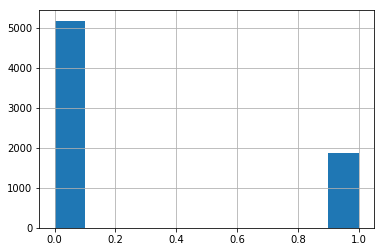

In [15]:
# Lets see the distribution of Churn data, this can effect model preformance if highly uneven
y.hist()

These class have fairly similar distrobutions, we will not have to further tweak them in this case.

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
# We want to fit and transform our features to values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
# We fit and transform on the train set, then we transfrom the test set
# using the mean and standard deviation from the train set
x_train = min_max.fit_transform(x_train)
x_test = min_max.transform(x_test)

In [18]:
# Because Sklearn outputs an Numpy array these couple lines convert it to a DataFrame
test_df = pd.DataFrame(x_test)
# This gives you a better idea of what MinMax is doing
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.847222,1.0,0.0,0.853234,0.732711,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.944444,1.0,1.0,0.669154,0.655928,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.083333,1.0,1.0,0.749254,0.061763,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.652778,1.0,0.0,0.569154,0.408196,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.944444,0.0,0.0,0.265672,0.355259,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Step 7: Feature Selection
Here is where we statistically select only the features which help most in predicting the dependent variable. A few of the benifits of this step are:

-  Reduces Overfitting
-  Improves Accuracy
-  Reduces Training Time

A more practical reason for doing this is to also give us reasons why our model predicted what it did. If our model is 100% accurate but we have no clue why a customer is going to leave, it does very little to improve the business's bottom line.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# K is the number of best features to keep
k_best = SelectKBest(score_func=chi2, k=4)
fit = k_best.fit(x_train, y_train)

# Cleans up the scores for each feature
np.set_printoptions(precision=3)
print(fit.scores_)

# We now want to know what the indices are for these important features
mask = k_best.get_support()
new_features = x.columns[mask]

train_features = fit.transform(x_train)
test_features = fit.transform(x_test)

# Lets see what features are the most important
new_features

[9.514e-03 8.183e+01 6.072e+01 8.419e+01 1.477e+02 6.544e-02 6.820e+01
 3.460e+01 4.658e+01 6.025e-01 4.029e+00 2.549e+02 1.956e+02 1.956e+02
 9.933e+01 1.956e+02 1.993e+01 1.956e+02 1.336e+01 1.956e+02 8.967e+01
 1.956e+02 9.473e+00 1.956e+02 1.267e+01 1.110e+02 3.280e+02 6.530e+01
 3.161e+02 3.980e+01]


Index(['InternetService_Fiber optic', 'StreamingMovies_No internet service',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')

Here we can see the most important factors for preventing Churn. This is were we would make some pretty graphics and convince other departments to get people signed up for 2 year contracts, paying with electronic check, and offer discounted rates for fiber optic and movie streaming services.

## Model fitting
The dirty work has been done and now comes the most exciting part of machine learning, feeding our model the data! Since we are only doing a binary classification, we could impliment one of many different algorithms. We will test a few popular ensemble ones. Ensemble modeling takes many 'weak learners' and combines them together into a powerful model. 

Often it is helpful to get a baseline using a simple model and all the features, we will use linear regression.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Variance Score: {}'.format(r2_score(y_test, y_pred)))

Mean Squared Error: 0.1351311318523445
Variance Score: 0.30387116942436265


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
# Train a model with 6 weak learners and tree depth of 3
# After trying several different number of K features, using all actually does the best in this dataset
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.4,
                                max_depth=3).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8021769995267393

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=12, learning_rate=0.7).fit(x_train, y_train)
clf.score(x_test, y_test)

0.7936583057264552

## Summary
Here we cleaned our data and did several other data preprocessing steps. Then we looked at the important features that we could later report and dive deeper into, such as maybe older customers want something different than younger ones. Finally we fitted a model that has an accuaracy of around 80% that we can build into a business pipeline. 

The key to take away is that preprocessing your data is the most time consuming part of the job. Expect around 80-90% of your time to go towards getting the data in a proper format to learn on.
